<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Reading-the-geolocation-data" data-toc-modified-id="Reading-the-geolocation-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading the geolocation data</a></span></li><li><span><a href="#Check-the-metadata-with-hdf4ls" data-toc-modified-id="Check-the-metadata-with-hdf4ls-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check the metadata with hdf4ls</a></span></li><li><span><a href="#Read-the-CoreMetadata.0-attribute-with-parseMeta" data-toc-modified-id="Read-the-CoreMetadata.0-attribute-with-parseMeta-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Read the CoreMetadata.0 attribute with parseMeta</a></span></li><li><span><a href="#Plotting-the-lats-and-lons" data-toc-modified-id="Plotting-the-lats-and-lons-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plotting the lats and lons</a></span></li></ul></div>

In [1]:
from pathlib import Path
from pyhdf.SD import SD, SDC
from matplotlib import pyplot as plt
import context

******************************
context imported. Front of path:
/Users/phil/repos/a301_code

******************************



# Introduction

This notebook shows how to use:

* [hdf4ls](https://github.com/phaustin/a301_code/blob/master/a301/scripts/hdf4ls.py) to
  list the contents of an hdf4 Modis file
  
* [modismeta_read](https://github.com/phaustin/a301_code/blob/master/a301/scripts/modismeta_read.py) to print
  some of the metadata of an hdf4 Modis file
  
You'll need to download the MYD03 lat/lon file from LAADSweb that corresponds to your
MYD02 level1b granule

# Reading the geolocation data

I downloaded a lat/lon MYD03 file from LAADSweb.  This contains the center lat and longitude
of every pixel at 1 km resolution.

In [8]:
#Path.cwd finds the "current working directory", i.e. the directory holding this notebook.
this_dir=Path.cwd()
#move up one one folder and down to data
data_dir = this_dir.parent / Path('data')
hdf_files=list(data_dir.glob("MYD03*2110*.hdf"))
print(hdf_files)

[PosixPath('/Users/phil/repos/a301_code/data/MYD03.A2013222.2110.006.2013223160438.hdf')]


In [11]:
read_data=True
if read_data:
    filename="MYD03.A2013222.2105.006.2013223155808.hdf"
    from a301.utils.data_read import download
    download(filename)
    local_file = Path.cwd() / Path(filename)
    to_file = data_dir / Path(filename)
    local_file.rename(to_file)

trying https://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/MYD03.A2013222.2105.006.2013223155808.hdf
writing to: MYD03.A2013222.2105.006.2013223155808.hdf
writing temporary file MYD03.A2013222.2105.006.2013223155808.hdf_tmp
downloaded MYD03.A2013222.2105.006.2013223155808.hdf
size = 38259686


# Check the metadata with hdf4ls

In [3]:
from a301.scripts.hdf4ls import hdf4ls
help(hdf4ls)

Help on function hdf4ls in module a301.scripts.hdf4ls:

hdf4ls(filename)
    Read the SDS datasets and global attributes of an hdf4 file
    
    Parameters
    ----------
    
    filename: str or Path object
        hdf4 file to read
    
    Returns
    -------
    
    prints the metadata



In [4]:
hdf4ls(hdf_files[0])


**************************************************
Reading /Users/phil/repos/a301_code/data/MYD03.A2013222.2110.006.2013223160438.hdf

nnumber of datasets, number of attributes
=(46, 27)
**************************************************


**************************************************
Here are the datasets
**************************************************

0 Latitude
1 Longitude
2 Scan Offset
3 Track Offset
4 Height Offset
5 Height
6 SensorZenith
7 SensorAzimuth
8 Range
9 SolarZenith
10 SolarAzimuth
11 Land/SeaMask
12 WaterPresent
13 gflags
14 Scan number
15 EV frames
16 SD frames
17 SV frames
18 EV start time
19 SD start time
20 SV start time
21 EV center time
22 Mirror side
23 SD Sun zenith
24 SD Sun azimuth
25 Moon Vector
26 L1 scan quality
27 Geo scan quality
28 orb_pos
29 orb_vel
30 T_inst2ECR
31 attitude_angles
32 sun_ref
33 num_impulse
34 impulse_enc
35 impulse_time
36 Scan Type
37 thermal_correction
38 attitude_quality
39 ephemeris_quality
40 Focal_length
41 band_positio

# Read the CoreMetadata.0 attribute with parseMeta

In [5]:
from a301.scripts.modismeta_read import parseMeta
help(parseMeta)

Help on function parseMeta in module a301.scripts.modismeta_read:

parseMeta(filename)
    Read useful information from a CoreMetata.0 attribute
    
    Parameters
    ----------
    
    filename: str or Path object
       name of an hdf4 modis level1b file
    
    Returns
    -------
    
    outDict: dict
        key, value:
    
    lat_list: np.array
        4 corner latitudes
    lon_list: np.array
        4 corner longitudes
    max_lat: float
        largest corner latitude
    min_lat: float
        smallest corner latitude
    max_lon: float
        largest corner longitude
    min_lon: float
        smallest corner longitude
    daynight: str
        'Day' or 'Night'
    starttime: str
        swath start time in UCT
    stoptime: str
        swath stop time in UCT
    startdate: str
        swath start datein UCT
    orbit: str
        orbit number
    equatordate: str
        equator crossing date in UCT
    equatortime: str
        equator crossing time in UCT
    nasaP

In [6]:
parseMeta(hdf_files[0])

{'orbit': '59949',
 'filename': 'MYD03.A2013222.2110.006.2013223160438.hdf',
 'stopdate': '2013-08-10 UCT',
 'startdate': '2013-08-10 UCT',
 'starttime': '21:10:00 UCT',
 'stoptime': '21:15:00 UCT',
 'equatortime': '21:45:48 UCT',
 'equatordate': '2013-08-10 UCT',
 'nasaProductionDate': '2013-08-11 UCT',
 'daynight': 'Day',
 'lon_list': array([-106.39094614, -137.78983039, -155.18611146, -106.79916586]),
 'lat_list': array([50.1393144 , 45.72054822, 60.99526212, 68.45102332]),
 'min_lat': 45.7205482204105,
 'max_lat': 68.4510233174609,
 'min_lon': -155.186111461133,
 'max_lon': -106.390946141148,
 'lon_0': -130.7885288011405,
 'lat_0': 57.08578576893569}

# Plotting the lats and lons

In [16]:
the_file = SD(str(hdf_files[0]), SDC.READ)
lat_data = the_file.select('Latitude')
lon_data = the_file.select('Longitude')

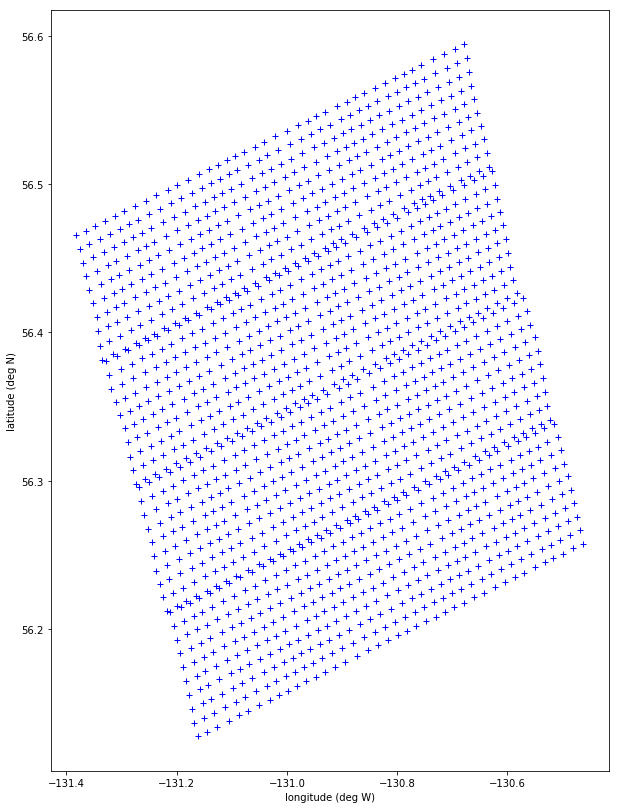

In [24]:
fig,ax = plt.subplots(1,1,figsize = (10,14))
ax.plot(lon_data[900:940,900:940],lat_data[900:940,900:940],'b+');
ax.set(xlabel='longitude (deg W)',ylabel='latitude (deg N)');

**Note two things:  1) the pixels overlap and 2) they don't line up on lines of constant longitude and latitude**

**The pixels are also not all the same size -- this distortion is called the [bowtie effect](http://eoweb.dlr.de:8080/short_guide/D-MODIS.html)**